In [399]:
import os
import pandas as pd
import numpy as np

In [400]:
os.getcwd()

'C:\\Users\\Pranav\\Desktop\\MSBA\\Kaggle Competitions\\Titanic'

In [401]:
os.chdir(r'C:\Users\Pranav\Desktop\MSBA\Kaggle Competitions\Titanic')

In [402]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [403]:
train.shape, test.shape

((891, 12), (418, 11))

In [404]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [405]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [406]:
#Looking for duplicate records
train.duplicated().sum()

0

In [407]:
#Looking for duplicate customers
train['PassengerId'].duplicated().sum()

0

In [408]:
#Checking column datatypes
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [409]:
#Checking for NA values
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [410]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [411]:
# Cabin has many missing values (687/891) so we go ahead and remove those
train.drop(['Cabin'], axis =1, inplace = True)
test.drop(['Cabin'], axis =1, inplace = True)

In [412]:
#imputing the missing values for age with mean values
train['Age'].fillna(train['Age'].dropna().mean(), inplace = True) 
test['Age'].fillna(test['Age'].dropna().mean(), inplace = True) 

In [413]:
train.dropna(inplace = True)
test['Fare'].fillna(test['Fare'].dropna().mean(), inplace = True) 

In [414]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

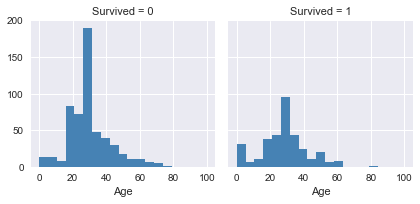

In [415]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

g = sns.FacetGrid(train, col="Survived", margin_titles=True)
bins = np.linspace(0, 100, 20)
g.map(plt.hist, "Age", color="steelblue", bins=bins)

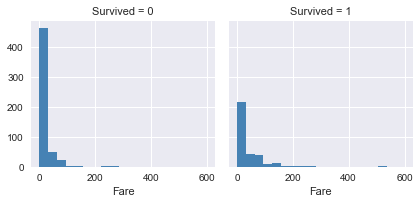

In [416]:
g = sns.FacetGrid(train, col="Survived", margin_titles=True)
bins = np.linspace(0, 600, 20)
g.map(plt.hist, "Fare", color="steelblue", bins=bins)

In [417]:
# Survival chances by Sex
pd.crosstab(train['Sex'], train['Survived']).apply(lambda x: round(x * 100/x.sum(), 2), axis = 1)

Survived,0,1
Sex,,
female,25.96,74.04
male,81.11,18.89


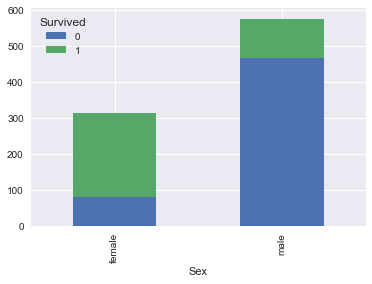

In [418]:
df.groupby(['Sex','Survived']).size().unstack().plot(kind='bar', stacked=True)

In [419]:
# Survival chances by Sibings
pd.crosstab(train['SibSp'], train['Survived']).apply(lambda x: round(x * 100/x.sum(), 2), axis = 1)

Survived,0,1
SibSp,,
0,65.68,34.32
1,46.41,53.59
2,53.57,46.43
3,75.00,25.00
4,83.33,16.67
5,100.00,0.00
8,100.00,0.00


In [420]:
# Survival chances by having parents
pd.crosstab(train['Parch'], train['Survived']).apply(lambda x: round(x * 100/x.sum(), 2), axis = 1)

Survived,0,1
Parch,,
0,65.83,34.17
1,44.92,55.08
2,50.00,50.00
3,40.00,60.00
4,100.00,0.00
5,80.00,20.00
6,100.00,0.00


In [421]:
# Survival chances by embarked place
pd.crosstab(train['Embarked'], train['Survived']).apply(lambda x: round(x * 100/x.sum(), 2), axis = 1)

Survived,0,1
Embarked,,
C,44.64,55.36
Q,61.04,38.96
S,66.30,33.70


In [422]:
# Removing the ticket and name details from the data
train.drop(['Ticket', 'Name'], axis = 1, inplace = True)
test.drop(['Ticket', 'Name'], axis = 1, inplace = True)

In [423]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [424]:
train = pd.get_dummies(data=train, columns=['Sex', 'Embarked'])
test = pd.get_dummies(data=test, columns=['Sex', 'Embarked'])

In [425]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [426]:
X_train, y_train = train.drop(['Survived'], axis =1), train.loc[:,'Survived']

In [427]:
from sklearn.linear_model import LogisticRegression

In [428]:
clf = LogisticRegression()

In [429]:
model = clf.fit(X_train,y_train)

In [430]:
preds  = model.predict(test)

In [442]:
results = pd.DataFrame({'PassengerId':np.array(test['PassengerId']),'Survived':preds}, index = None)

In [443]:
results.to_csv('Submission1.csv')